In [1]:
#https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import numpy as np
import string
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import plot_model
from tensorflow.keras.layers import Embedding
from keras_preprocessing.sequence import pad_sequences


In [2]:
df = pd.read_csv('amazon_cells_labelled.txt', header=None, delimiter='\t', names=['txt', 'sentiment'])
df

,txt,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [3]:
%%time
MAX_TRX_LEN = 1000
EMBEDDING_VECTOR_LEN = 8
NUM_OF_LSTM_INTERNAL_UNITS = 20

# get all characters
[string.printable.find(letter)+1 for letter in string.printable]
    
df['raw_with_ids'] = df['txt'].apply(lambda x : [string.printable.find(letter)+1 for letter in x])

# train / test split
X_train, X_test, y_train, y_test = train_test_split(df['raw_with_ids'], df['sentiment'], test_size=0.2, random_state=42)
X_train = pad_sequences(X_train, maxlen=MAX_TRX_LEN)
X_test = pad_sequences(X_test, maxlen=MAX_TRX_LEN)
X_train



CPU times: total: 31.2 ms
Wall time: 22.9 ms


array([[ 0,  0,  0, ..., 17, 15, 76],
       [ 0,  0,  0, ..., 24, 17, 76],
       [ 0,  0,  0, ..., 15, 28, 76],
       ...,
       [ 0,  0,  0, ..., 25, 31, 76],
       [ 0,  0,  0, ..., 11, 35, 76],
       [ 0,  0,  0, ..., 19, 24, 76]])

In [4]:
df['raw_with_ids']

0      [55, 25, 95, 30, 18, 15, 28, 15, 95, 19, 29, 9...
1      [43, 25, 25, 14, 95, 13, 11, 29, 15, 74, 95, 4...
2      [43, 28, 15, 11, 30, 95, 16, 25, 28, 95, 30, 1...
3      [56, 19, 15, 14, 95, 30, 25, 95, 13, 18, 11, 2...
4      [56, 18, 15, 95, 23, 19, 13, 95, 19, 29, 95, 1...
                             ...                        
995    [56, 18, 15, 95, 29, 13, 28, 15, 15, 24, 95, 1...
996    [59, 18, 11, 30, 95, 11, 95, 26, 19, 15, 13, 1...
997    [45, 30, 15, 23, 95, 40, 25, 15, 29, 95, 50, 2...
998    [56, 18, 15, 95, 25, 24, 22, 35, 95, 30, 18, 1...
999    [61, 25, 31, 95, 13, 11, 24, 95, 24, 25, 30, 9...
Name: raw_with_ids, Length: 1000, dtype: object

In [5]:
# build model
model = Sequential()
model.add(Embedding(input_dim=len(string.printable) + 1, output_dim=EMBEDDING_VECTOR_LEN, input_length=MAX_TRX_LEN))
model.add(LSTM(NUM_OF_LSTM_INTERNAL_UNITS, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 8)           808       
                                                                 
 lstm (LSTM)                 (None, 20)                2320      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 3,149
Trainable params: 3,149
Non-trainable params: 0
_________________________________________________________________
None


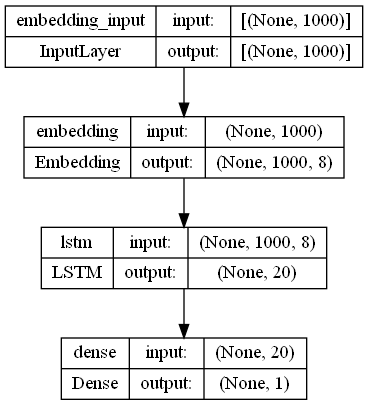

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)


In [7]:
%%time
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {scores[1]}')


Epoch 1/20
13/13 [==============================] - 7s 407ms/step - loss: 0.6936 - accuracy: 0.4625 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
13/13 [==============================] - 5s 398ms/step - loss: 0.6929 - accuracy: 0.5150 - val_loss: 0.6937 - val_accuracy: 0.4650
Epoch 3/20
13/13 [==============================] - 5s 398ms/step - loss: 0.6926 - accuracy: 0.5088 - val_loss: 0.6940 - val_accuracy: 0.4650
Epoch 4/20
13/13 [==============================] - 5s 392ms/step - loss: 0.6922 - accuracy: 0.5088 - val_loss: 0.6940 - val_accuracy: 0.4650
Epoch 5/20
13/13 [==============================] - 6s 458ms/step - loss: 0.6914 - accuracy: 0.5138 - val_loss: 0.6937 - val_accuracy: 0.4850
Epoch 6/20
13/13 [==============================] - 6s 469ms/step - loss: 0.6900 - accuracy: 0.5312 - val_loss: 0.6917 - val_accuracy: 0.5050
Epoch 7/20
13/13 [==============================] - 6s 470ms/step - loss: 0.6852 - accuracy: 0.5700 - val_loss: 0.6896 - val_accuracy: 0.5250
Epoch 

# Task

### Improve this LSTM classifier by understanding and tweeking its parameters